In [1]:
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import shapely.affinity as aff
import shapely.geometry as geo

import sys
sys.path.append("../")
from electronfactors.ellipse.utilities import (
    shapely_ellipse, _CustomBasinhopping)
from electronfactors.visuals.shape_display import (
    display_shapely, display_stored_cutout)

In [2]:
def to_eqPonA(width, length):
    ratio = width/length
    eqPonA = 2*(3*(ratio+1) - np.sqrt((3*ratio+1)*(ratio+3))) / width
    
    return eqPonA

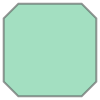

In [3]:
def shapely_aperture(aperture_size):
    bevel = 1.0
    size_at_100 = aperture_size / 0.95
    pos = size_at_100/2 - bevel
    base_square = geo.Polygon([(-pos, -pos),
                          (pos, -pos),
                          (pos, pos),
                          (-pos, pos)])

    aperture = base_square.buffer(bevel, join_style=3)    
    return aperture

shapely_aperture(6)

In [4]:
def make_to_minimise(width, edge_buffer, aperture_size):
    aperture = shapely_aperture(aperture_size) 
    aperture_erroded = aperture.buffer(-edge_buffer)
    
    def to_minimise(optimiser_input):
        ellipse_input = [
            0, 0, width,
            optimiser_input[0], optimiser_input[1]]
        ellipse = shapely_ellipse(ellipse_input)
        return (100 * ellipse.difference(aperture_erroded).area + 
                aperture_erroded.difference(ellipse).area)
    return to_minimise

def ellipse_in_aperture(width, edge_buffer, aperture_size):

    initial = np.array([aperture_size, 45])
    step_noise = np.array([aperture_size, 30])

    optimiser = _CustomBasinhopping(
        to_minimise=make_to_minimise(width, edge_buffer, aperture_size),
        initial=initial,
        step_noise=step_noise,
        n=3,
        confidence=0.01
    )
    
    length = optimiser.result[0]
    angle = optimiser.result[1]
    
    ellipse_input = [0, 0, width, length, angle]
    ellipse = shapely_ellipse(ellipse_input)

    aperture = shapely_aperture(aperture_size)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    display_shapely(aperture, ax=ax)
    display_shapely(ellipse, ax=ax)    
    plt.show()
    
    return length

In [5]:
def batch_ellipse_in_aperture(width_list, errosion, aperture_size):    
    length_list = [
        ellipse_in_aperture(width, errosion, aperture_size) 
        for width in width_list]    
        
    return np.abs(length_list)

In [6]:
edge_buffer = 0.125
width = dict()
length = dict()
eqPonA = dict()

long_ellipse_width = dict()
long_ellipse_length = dict()

circles = dict()

thin_ellipses_width = dict()
thin_ellipses_length = dict()

short_ellipses_width = dict()
short_ellipses_length = dict()

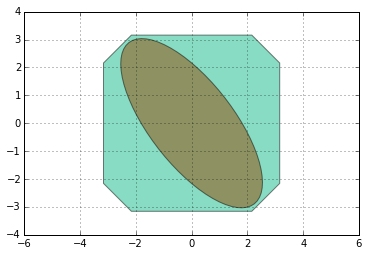

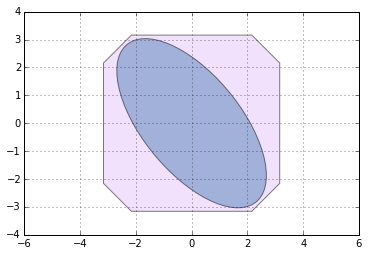

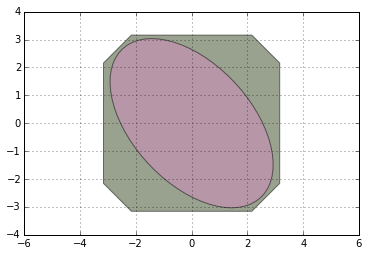

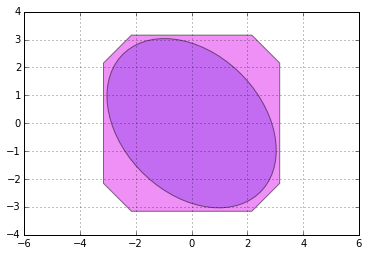

In [7]:
aperture_size = 6
long_ellipse_width[aperture_size] = [3, 3.5, 4.25, 5]

long_ellipse_length[aperture_size] = batch_ellipse_in_aperture(
    long_ellipse_width[aperture_size], 
    edge_buffer, aperture_size)

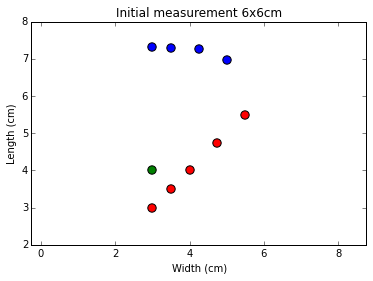

In [8]:
aperture_size = 6
plt.scatter(
    long_ellipse_width[aperture_size], 
    long_ellipse_length[aperture_size], s=70)

circles[aperture_size] = np.array([3, 3.5, 4, 4.75, 5.5])
plt.scatter(
    circles[aperture_size],
    circles[aperture_size], c='red', s=70)

thin_ellipses_width[aperture_size] = [3]*1
thin_ellipses_length[aperture_size] = [4]
plt.scatter(
    thin_ellipses_width[aperture_size], 
    thin_ellipses_length[aperture_size], c='green', s=70)

plt.title('Initial measurement 6x6cm')
plt.axis("equal")
plt.xlabel("Width (cm)")
plt.ylabel("Length (cm)")

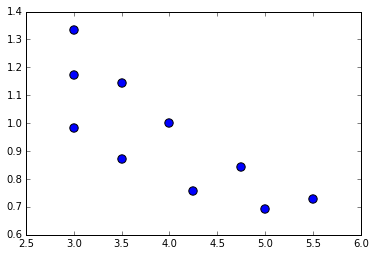

In [9]:
width[aperture_size] = np.concatenate([
    circles[aperture_size], 
    long_ellipse_width[aperture_size], 
    thin_ellipses_width[aperture_size]])

length[aperture_size] = np.concatenate([
    circles[aperture_size], 
    long_ellipse_length[aperture_size], 
    thin_ellipses_length[aperture_size]])

eqPonA[aperture_size] = to_eqPonA(
    width[aperture_size], length[aperture_size])

plt.scatter(width[aperture_size], eqPonA[aperture_size], s=70)

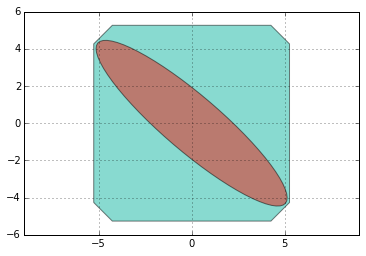

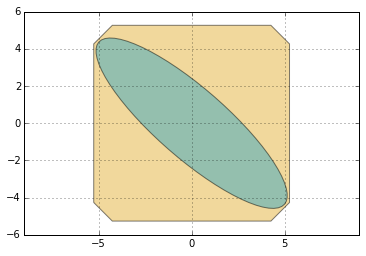

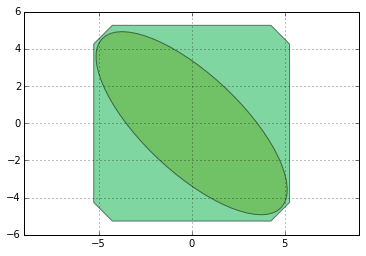

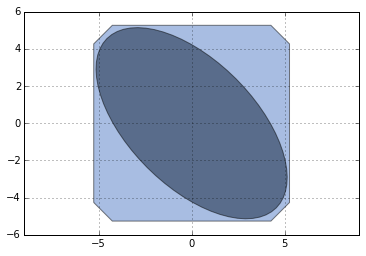

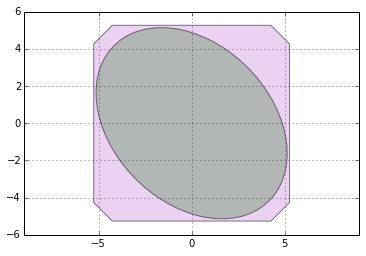

In [10]:
aperture_size = 10
long_ellipse_width[aperture_size] = [3, 3.75, 5.25, 6.75, 8.5]

long_ellipse_length[aperture_size] = batch_ellipse_in_aperture(
    long_ellipse_width[aperture_size], 
    edge_buffer, aperture_size)

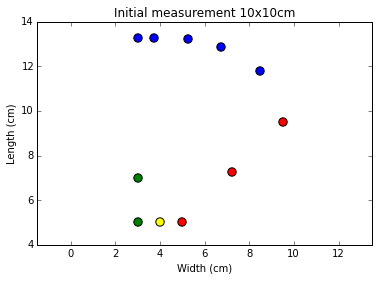

In [11]:
aperture_size = 10
plt.scatter(
    long_ellipse_width[aperture_size], 
    long_ellipse_length[aperture_size], s=70)

circles[aperture_size] = np.array([5, 7.25, 9.5])
plt.scatter(
    circles[aperture_size],
    circles[aperture_size], c='red', s=70)

thin_ellipses_width[aperture_size] = [3]*2
thin_ellipses_length[aperture_size] = [5, 7]
plt.scatter(
    thin_ellipses_width[aperture_size], 
    thin_ellipses_length[aperture_size], c='green', s=70)

short_ellipses_width[aperture_size] = [4]
short_ellipses_length[aperture_size] = [5]
plt.scatter(
    short_ellipses_width[aperture_size], 
    short_ellipses_length[aperture_size], c='yellow', s=70)

plt.title('Initial measurement 10x10cm')
plt.axis("equal")
plt.xlabel("Width (cm)")
plt.ylabel("Length (cm)")

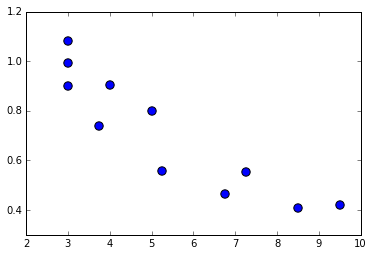

In [12]:
width[aperture_size] = np.concatenate([
    circles[aperture_size], 
    long_ellipse_width[aperture_size], 
    thin_ellipses_width[aperture_size],
    short_ellipses_width[aperture_size]])

length[aperture_size] = np.concatenate([
    circles[aperture_size], 
    long_ellipse_length[aperture_size], 
    thin_ellipses_length[aperture_size],
    short_ellipses_length[aperture_size]])

eqPonA[aperture_size] = to_eqPonA(
    width[aperture_size], length[aperture_size])

# plt.figure(figsize=(6,10))
plt.scatter(width[aperture_size], eqPonA[aperture_size], s=70)

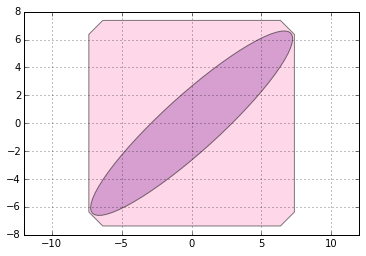

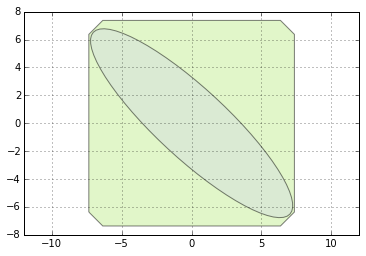

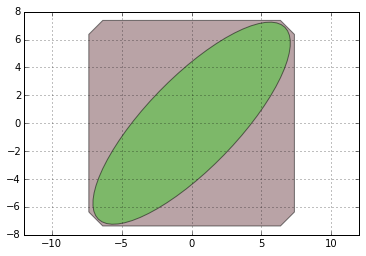

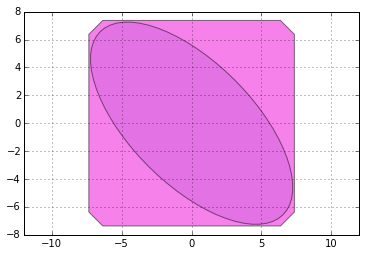

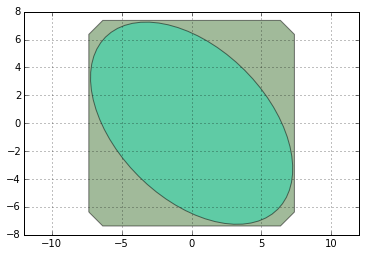

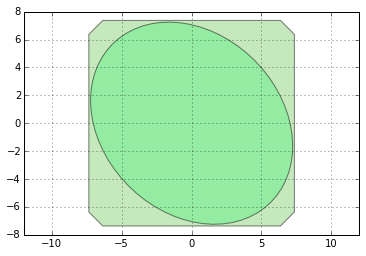

In [13]:
aperture_size = 14
long_ellipse_width[aperture_size] = [4, 5, 6.5, 8.75, 10.75, 12.75]

long_ellipse_length[aperture_size] = batch_ellipse_in_aperture(
    long_ellipse_width[aperture_size], 
    edge_buffer, aperture_size)

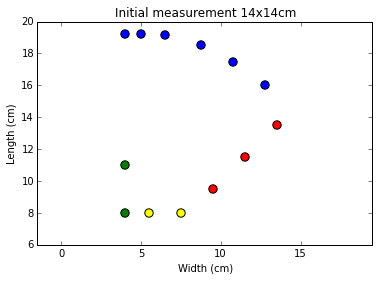

In [14]:
aperture_size = 14
plt.scatter(
    long_ellipse_width[aperture_size], 
    long_ellipse_length[aperture_size], s=70)

circles[aperture_size] = np.array([9.5, 11.5, 13.5])
plt.scatter(
    circles[aperture_size],
    circles[aperture_size], c='red', s=70)

thin_ellipses_width[aperture_size] = [4]*2
thin_ellipses_length[aperture_size] = [8, 11]
plt.scatter(
    thin_ellipses_width[aperture_size], 
    thin_ellipses_length[aperture_size], c='green', s=70)

short_ellipses_width[aperture_size] = [5.5, 7.5]
short_ellipses_length[aperture_size] = [8]*2
plt.scatter(
    short_ellipses_width[aperture_size], 
    short_ellipses_length[aperture_size], c='yellow', s=70)

plt.title('Initial measurement 14x14cm')
plt.axis("equal")
plt.xlabel("Width (cm)")
plt.ylabel("Length (cm)")

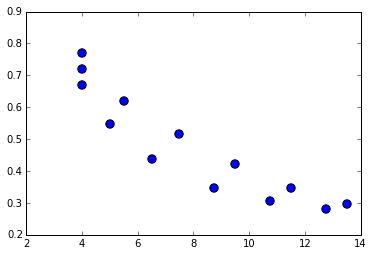

In [15]:
width[aperture_size] = np.concatenate([
    circles[aperture_size], 
    long_ellipse_width[aperture_size], 
    thin_ellipses_width[aperture_size],
    short_ellipses_width[aperture_size]])

length[aperture_size] = np.concatenate([
    circles[aperture_size], 
    long_ellipse_length[aperture_size], 
    thin_ellipses_length[aperture_size],
    short_ellipses_length[aperture_size]])

eqPonA[aperture_size] = to_eqPonA(
    width[aperture_size], length[aperture_size])

# plt.figure(figsize=(6,10))
plt.scatter(width[aperture_size], eqPonA[aperture_size], s=70)

In [16]:
import yaml
with open("imported_data/parameterised.yml", 'r') as file:
    input_dict = yaml.load(file)

In [17]:
label = np.array([key for key in input_dict])

width_loaded = np.array([input_dict[key]['width'] for key in label])
length_loaded = np.array([input_dict[key]['length'] for key in label])
eqPonA_loaded = to_eqPonA(width_loaded, length_loaded)

energy = np.array([input_dict[key]['energy'] for key in label])
applicator = np.array([input_dict[key]['applicator'] for key in label])

In [18]:
reference = (energy == 18) & (applicator == 10)
i = np.argmax(length_loaded[reference])

odd_length = label[reference][i]
odd_length

'P42'

In [19]:
input_dict[odd_length]['length']

11.32

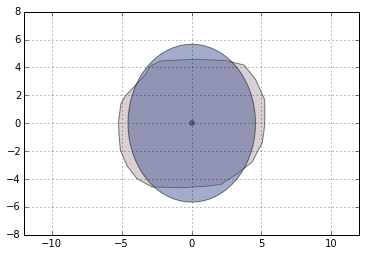

In [20]:
display_stored_cutout(**input_dict[odd_length])

In [21]:
to_be_filled_list = [
    (6, 10), (9, 10), (15, 10), (18, 10)]#, (9, 6), (18, 14)]

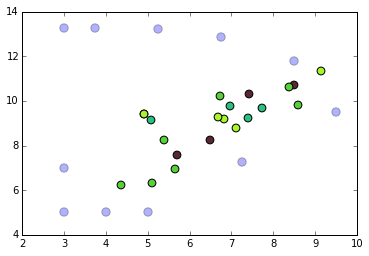

In [22]:
aperture_size = 10
plt.scatter(width[aperture_size], length[aperture_size], s=70, alpha=0.3)

for item in to_be_filled_list:
    reference = (energy == item[0]) & (applicator == item[1])
    
    colour = np.random.uniform(size=3)
    plt.scatter(
        width_loaded[reference], length_loaded[reference], 
        s=60, c=colour)

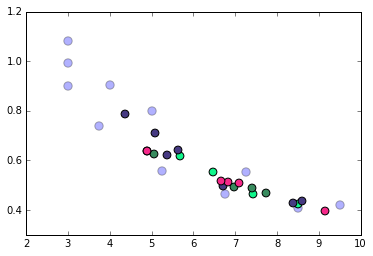

In [23]:
aperture_size = 10
plt.scatter(width[aperture_size], eqPonA[aperture_size], s=70, alpha=0.3)

for item in to_be_filled_list:
    reference = (energy == item[0]) & (applicator == item[1])
    
    colour = np.random.uniform(size=3)
    plt.scatter(
        width_loaded[reference], eqPonA_loaded[reference], 
        s=60, c=colour)

In [24]:
to_be_filled_list = [
    (9, 6)]

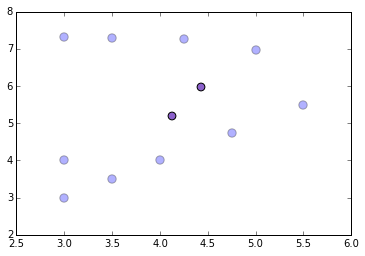

In [25]:
aperture_size = 6
plt.scatter(width[aperture_size], length[aperture_size], s=70, alpha=0.3)

for item in to_be_filled_list:
    reference = (energy == item[0]) & (applicator == item[1])
    
    colour = np.random.uniform(size=3)
    plt.scatter(
        width_loaded[reference], length_loaded[reference], 
        s=60, c=colour)

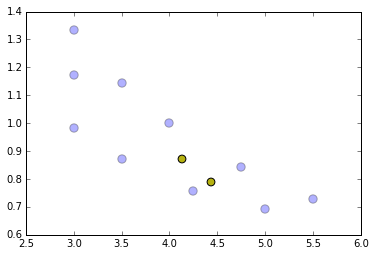

In [26]:
aperture_size = 6
plt.scatter(width[aperture_size], eqPonA[aperture_size], s=70, alpha=0.3)

for item in to_be_filled_list:
    reference = (energy == item[0]) & (applicator == item[1])
    
    colour = np.random.uniform(size=3)
    plt.scatter(
        width_loaded[reference], eqPonA_loaded[reference], 
        s=60, c=colour)

In [27]:
to_be_filled_list = [
    (18, 14)]

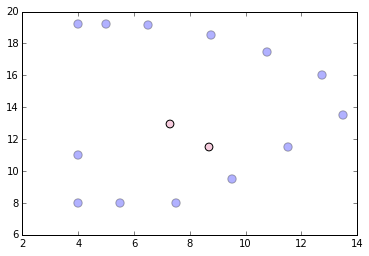

In [28]:
aperture_size = 14
plt.scatter(width[aperture_size], length[aperture_size], s=70, alpha=0.3)

for item in to_be_filled_list:
    reference = (energy == item[0]) & (applicator == item[1])
    
    colour = np.random.uniform(size=3)
    plt.scatter(
        width_loaded[reference], length_loaded[reference], 
        s=60, c=colour)

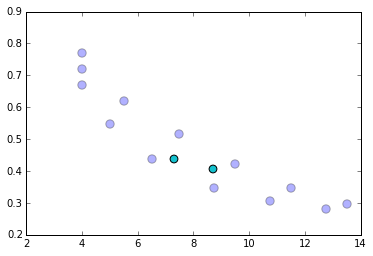

In [29]:
aperture_size = 14
plt.scatter(width[aperture_size], eqPonA[aperture_size], s=70, alpha=0.3)

for item in to_be_filled_list:
    reference = (energy == item[0]) & (applicator == item[1])
    
    colour = np.random.uniform(size=3)
    plt.scatter(
        width_loaded[reference], eqPonA_loaded[reference], 
        s=60, c=colour)